In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate
import pandas as pd

Welcome to JupyROOT 6.24/06


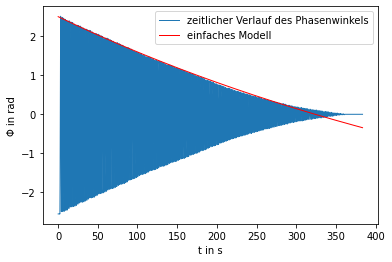

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


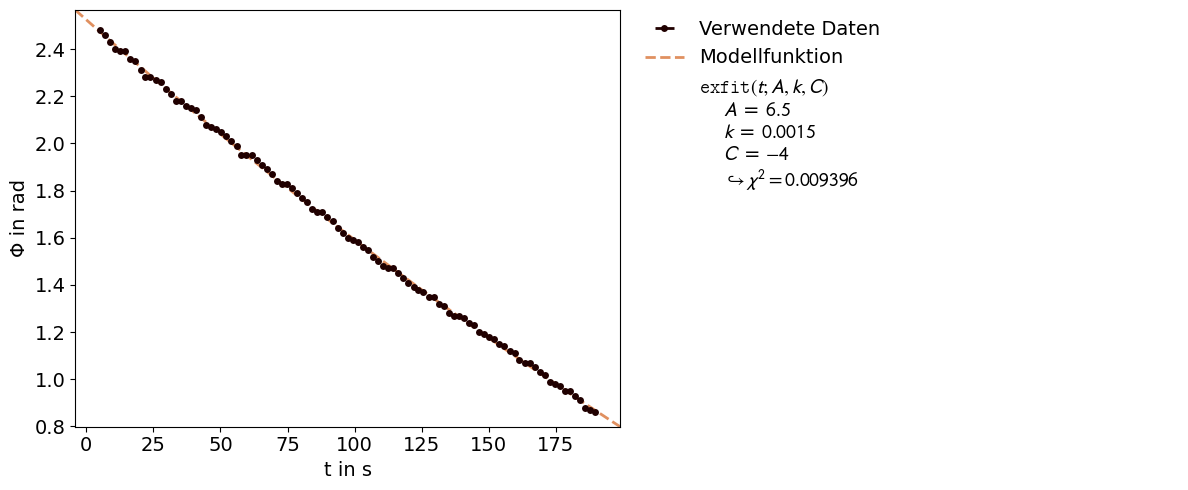

In [2]:
data=pd.read_csv('Aufgabe 1 Winkelzeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','w_t']
t = data['t'].to_numpy()
w_t = data['w_t'].to_numpy()
a=6.5
b=0.0015
c=-4
ab=a*np.exp(-t*b)+c
plt.plot(t, w_t, lw=1, label='zeitlicher Verlauf des Phasenwinkels')
plt.plot(t, ab, c='r', lw=1, label='einfaches Modell')
plt.xlabel('t in s')
plt.ylabel('Φ in rad')
plt.legend()

plt.savefig('Augabe 1 zeitlicher Verlauf des Phasenwinkels.png')
plt.show()



peaks=ppk.convolutionPeakfinder(w_t)
peaks = peaks[1:100]
#plt.plot(t[peaks],w_t[peaks],marker='.')

xy_data = XYContainer(t[peaks],w_t[peaks])
def exfit(t, A, k, C):
    return A*np.exp(-t*k) + C

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save('FIT1EINHULLENDE.png')

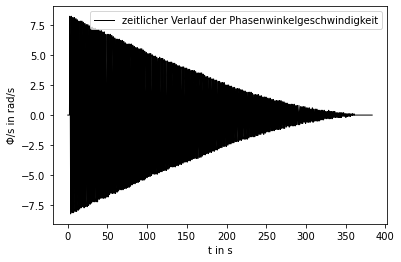

In [3]:
data=pd.read_csv('Aufgabe 1 Winkelgeschw Zeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','v_t']
t = data['t'].to_numpy()
v_t = data['v_t'].to_numpy()
plt.plot(t, v_t, c='black', lw=1, label='zeitlicher Verlauf der Phasenwinkelgeschwindigkeit')
plt.xlabel('t in s')
plt.ylabel('Φ/s in rad/s')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der Phasenwinkelgeschwindigkeit.png')
plt.show()

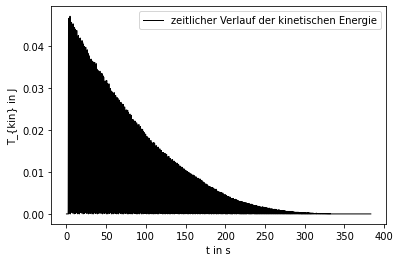

In [4]:
data=pd.read_csv('Aufgabe 1 Energie.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','T_kin']
t = data['t'].to_numpy()
T_kin = data['T_kin'].to_numpy()
plt.plot(t, T_kin, c='black', lw=1, label='zeitlicher Verlauf der kinetischen Energie')
plt.xlabel('t in s')
plt.ylabel('T_{kin} in J')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der kinetischen Energie.png')
plt.show()

Mittelwert Periodendauer: 1.8833333333333333
Standardabweichung der Periodendauer: 0.037267799624997364
Unsicherheit nach Gausscher Fehlerfortpflanzung: 0.0014640174352631727


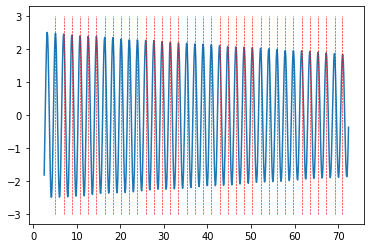

In [5]:
#Periodendauer
data=pd.read_csv('Aufgabe 1 Winkelzeit.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','w_t']
t = data['t'].to_numpy()
w_t = data['w_t'].to_numpy()
t = t[24:]
t = t[:700]
w_t = w_t[24:]
w_t = w_t[:700]
plt.plot(t,w_t)
peaks=ppk.convolutionPeakfinder(w_t)
t_mess=np.zeros(len(peaks)-1)
i=0
currenttime=0
for peak in peaks:
    if(i>0&i<len(peaks)-1):
        plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t_mess[i-1]=t[peak].copy()-currenttime
    i=i+1
    currenttime=t[peak].copy()


print('Mittelwert Periodendauer:',np.mean(t_mess))     #Mittelwert Periodendauer
print('Standardabweichung der Periodendauer:',np.sqrt(np.var(t_mess)))
print('Unsicherheit nach Gausscher Fehlerfortpflanzung:', np.sqrt(2)*(1/(len(peaks)-1))*np.sqrt(np.var(t_mess)))
T_0=np.mean(t_mess)

Während der Berechnung des Mittelwerts kürzen sich dadurch, 
das über die Zeitdifferenz der benachbarten Peaks gemittelt wird, 
alle Zeiten der Peaks außer dem ersten und dem letzten Peak heraus. Somit ergibt sich aus der Gausschen Fehlerfortpflanzung ein Vorfaktor $\frac{\sqrt{2}}{n}$ für den Fehler. 
Der Fehler ergibt sich somit zu:\
$$\begin{equation}
\begin{split}
\Delta{T} &= \frac{\sqrt{2}}{n}*\sigma \\
&= 0.03726 \text{s}
\end{split}
\end{equation}$$


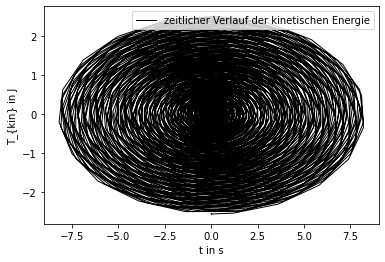

In [6]:
data=pd.read_csv('Aufgabe 1 Phasenraum.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','Phas']
t = data['t'].to_numpy()
phas = data['Phas'].to_numpy()
plt.plot(t, phas, c='black', lw=1, label='zeitlicher Verlauf der kinetischen Energie')
plt.xlabel('t in s')
plt.ylabel('T_{kin} in J')
plt.legend()

plt.savefig('Aufgabe 1 zeitlicher Verlauf der kinetischen Energie.png')
plt.show()

In [7]:
# Aufgabe 2

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/kafe2/core/minimizers/iminuit_minimizer.py:160: HesseFailedWarning: HESSE Failed. Covariance and GlobalCC will not be available
  self._get_iminuit().hesse()
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


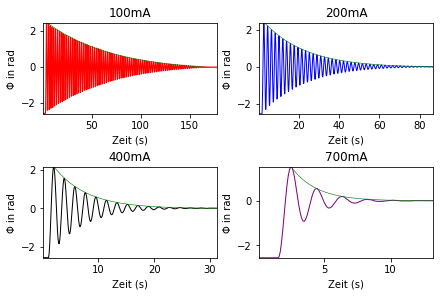

In [8]:
data=pd.read_csv('Aufgabe 2 100mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t1','100mA']

t1 = data['t1'].to_numpy()
f100mA = data['100mA'].to_numpy()

peaks1=ppk.convolutionPeakfinder(f100mA)
peaks1 = peaks1[1:100]
#plt.plot(t[peaks],w_t[peaks],marker='.')

xy_data = XYContainer(t[peaks1],f100mA[peaks1])
def exfit(t, A, k, C):
    return A*np.exp(-t*k) + C

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
#plot.plot()
#plot.show()
#plot.save('FIT2EINHULLENDE100mA.png')
################################################################

data=pd.read_csv('Aufgabe 2 200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t2','200mA']
t2 = data['t2'].to_numpy()
f200mA = data['200mA'].to_numpy()

peaks2=ppk.convolutionPeakfinder(f200mA)
peaks2 = peaks2[1:100]
#plt.plot(t[peaks],w_t[peaks],marker='.')

xy_data = XYContainer(t[peaks2],f200mA[peaks2])
def exfit(t, A, k, C):
    return A*np.exp(-t*k) + C

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
#plot.plot()
#plot.show()
#plot.save('FIT2EINHULLENDE200mA.png')

#############################################

data=pd.read_csv('Aufgabe 2 400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t3','400mA']
t3 = data['t3'].to_numpy()
f400mA = data['400mA'].to_numpy()

peaks3=ppk.convolutionPeakfinder(f400mA)
peaks3 = peaks3[1:100]
#plt.plot(t[peaks],w_t[peaks],marker='.')

xy_data = XYContainer(t[peaks3],f400mA[peaks3])
def exfit(t, A, k, C):
    return A*np.exp(-t*k) + C

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
#plot.plot()
#plot.show()
#plot.save('FIT2EINHULLENDE400mA.png')

##################################################


data=pd.read_csv('Aufgabe 2 700mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t4','700mA']
t4 = data['t4'].to_numpy()
f700mA = data['700mA'].to_numpy()

peaks4=ppk.convolutionPeakfinder(f700mA)
peaks4 = peaks4
#plt.plot(t[peaks],w_t[peaks],marker='.')

xy_data = XYContainer(t[peaks4],f700mA[peaks4])
def exfit(t, A, k, C):
    return A*np.exp(-t*k) + C

line_fit=Fit(data=xy_data,model_function=exfit)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
#plot.plot()
#plot.show()
#plot.save('FIT2EINHULLENDE700mA.png')

#########################################

fig, ax = plt.subplots(2,2,constrained_layout = True)   #gemessene Daten plotten
plt.rcParams["figure.figsize"] = [12,8]
plt.subplot(2,2,1)
plt.plot(t1, f100mA, c='red', lw=1, label='Φ bei 100mA')
plt.plot(t1,exfit(t1,2.9,0.015,-0.25),c='green',lw=0.6,label='Einhüllende')
plt.xlabel('Zeit (s)')
plt.ylabel('Φ in rad')
plt.xlim([min(t1), max(t1)])
plt.ylim([min(f100mA), max(f100mA)])
plt.title('100mA')

plt.subplot(2,2,2)
plt.plot(t2, f200mA, c='blue', lw=1, label='Φ bei 200mA')
plt.plot(t2,exfit(t2,2.8,0.048,-0.052),c='green',lw=0.6,label='Einhüllende')
plt.xlabel('Zeit (s)')
plt.ylabel('Φ in rad')
plt.xlim([min(t2), max(t2)])
plt.ylim([min(f200mA), max(f200mA)])
plt.title('200mA')


plt.subplot(2,2,3)
plt.plot(t3, f400mA, c='black', lw=1, label='Φ bei 400mA')
plt.plot(t3,exfit(t3,3.1,0.17,-0.024),c='green',lw=0.6,label='Einhüllende')
plt.xlabel('Zeit (s)')
plt.ylabel('Φ in rad')
plt.xlim([min(t3), max(t3)])
plt.ylim([min(f400mA), max(f400mA)])
plt.title('400mA')


plt.subplot(2,2,4)
plt.plot(t4, f700mA, c='purple', lw=1, label='Φ bei 700mA')
plt.plot(t1,exfit(t1,5.8,0.53,-0.0081),c='green',lw=0.6,label='Einhüllende')
plt.xlabel('Zeit (s)')
plt.ylabel('Φ in rad')
plt.xlim([min(t4), max(t4)])
plt.ylim([min(f700mA), max(f700mA)])
plt.title('700mA')

plt.show()

In [9]:
data=pd.read_csv('Aufgabe 2 100mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t1','100mA']
t1 = data['t1'].to_numpy()
f100mA = data['100mA'].to_numpy()
peaks1 = ppk.convolutionPeakfinder(f100mA)
peaks1=peaks1[1:-2]

data=pd.read_csv('Aufgabe 2 200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t2','200mA']
t2 = data['t2'].to_numpy()
f200mA = data['200mA'].to_numpy()
peaks2=ppk.convolutionPeakfinder(f200mA)
peaks2=peaks2[1:-2]

data=pd.read_csv('Aufgabe 2 400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t3','400mA']
t3 = data['t3'].to_numpy()
f400mA = data['400mA'].to_numpy()
peaks3=ppk.convolutionPeakfinder(f400mA)
peaks3=peaks3[1:-2]


data=pd.read_csv('Aufgabe 2 700mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t4','700mA']
t4 = data['t4'].to_numpy()
f700mA = data['700mA'].to_numpy()
peaks4=ppk.convolutionPeakfinder(f700mA)
peaks4 = peaks4[:-2]
print(f700mA[peaks4])


k1=0
for i in range(1,len(peaks1),1):
    k1 = k1 + f100mA[peaks1[i-1]]/f100mA[peaks1[i]]
k1 = (1/len(peaks1))*k1
print("k1:",k1)

k2=0
for i in range(1,len(peaks2),1):
    k2 = k2 + f200mA[peaks2[i-1]]/f200mA[peaks2[i]]
k2 = (1/len(peaks2))*k2
print("k2:",k2)

k3=0
for i in range(1,len(peaks3),1):
    k3 = k3 + f400mA[peaks3[i-1]]/f400mA[peaks3[i]]
k3 = (1/len(peaks3))*k3
print("k3:",k3) 

k4=0
for i in range(1,len(peaks4),1):
    k4 = k4 + f700mA[peaks4[i-1]]/f700mA[peaks4[i]]
k4 = (1/len(peaks4))*k4
print("k4:",k4) 

t1_mess=np.zeros(len(peaks1)-1)
i=0
currenttime=0
for peak in peaks1:
    if(i>0&i<len(peaks1)-1):
        #plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t1_mess[i-1]=t1[peak]-currenttime
    i=i+1
    currenttime=t1[peak]
print("T1:",np.mean(t1_mess))
T1=np.mean(t1_mess)

t2_mess=np.zeros(len(peaks2)-1)
i=0
currenttime=0
for peak in peaks2:
    if(i>0&i<len(peaks2)-1):
        #plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t2_mess[i-1]=t2[peak]-currenttime
    i=i+1
    currenttime=t2[peak]
print("T2:",np.mean(t2_mess))
T2=np.mean(t2_mess)

t3_mess=np.zeros(len(peaks3)-1)
i=0
currenttime=0
for peak in peaks3:
    if(i>0&i<len(peaks3)-1):
        #plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t3_mess[i-1]=t3[peak]-currenttime
    i=i+1
    currenttime=t3[peak]
print("T3:",np.mean(t3_mess))
T3=np.mean(t3_mess)

t4_mess=np.zeros(len(peaks4)-1)
i=0
currenttime=0
for peak in peaks4:
    if(i>0&i<len(peaks4)-1):
        #plt.vlines(t[peak], -3, 3, color='red', ls='--',linewidth=0.6)
        t4_mess[i-1]=t4[peak]-currenttime
    i=i+1
    currenttime=t4[peak]
print("T4:",np.mean(t4_mess))
T4=np.mean(t4_mess)

B1 = np.log(k1)/T1
B2 = np.log(k2)/T2
B3 = np.log(k3)/T3
B4 = np.log(k4)/T4

print("B1:",B1,"B2:",B2,"B3:",B3,"B4:",B4)

[1.52 0.55 0.19 0.06]
k1: 1.05812385955992
k2: 1.1184247950061639
k3: 1.2693414459406829
k4: 2.2062599681020734
T1: 1.8839080459770112
T2: 1.8833333333333333
T3: 1.8153846153846156
T4: 1.8999999999999997
B1: 0.029989465904127977 B2: 0.059427218931794014 B3: 0.13137613784660046 B4: 0.41647303147851755


1. FORMEL


/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


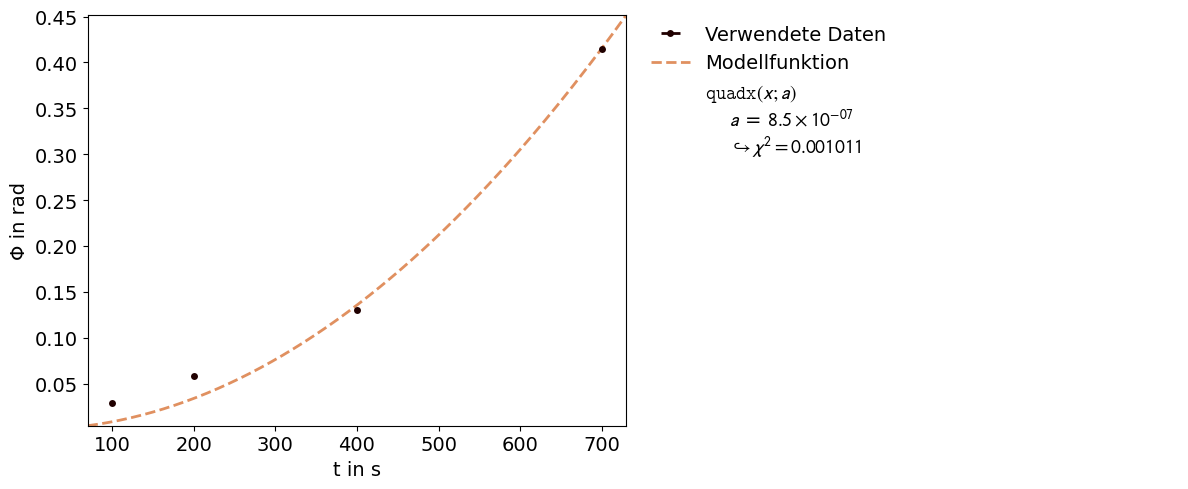

In [27]:
B0 = 0.0015
B1k = B1 - B0
B2k = B2 - B0
B3k = B3 - B0
B4k = B4 - B0

Bk = [B1k,B2k,B3k,B4k]
Ib = [100,200,400,700]

#plt.plot(Ib,Bk,marker='.')
def quadx(x,a):
    return a*x**2
xy_data = XYContainer(Ib,Bk)

line_fit=Fit(data=xy_data,model_function=quadx)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='U_H', a='a', b='B_0')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

#line_fit.assign_parameter_latex_names(x='t', a='A', k='k')
#line_fit.assign_model_function_latex_name('Φ')
#line_fit.assign_model_function_latex_expression('{A} cdot e^{-kt} + {C}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["t in s", "Φ in rad"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
#plot.save('FIT2EINHULLENDE400mA.png')


In [29]:
w0 = 2*np.pi/T_0
print(w0)
I_w0 = np.sqrt(w0/(8.5*10**-7))
print(I_w0) #Stromstärke bei aperiodischem Grenzfall

3.3362045878829663
1981.1477920589268


In [36]:
#Güte lässt sich durch wo/2B berechnen, die nötige näherung für die Formel ist für 700mA aber nicht mehr gegeben.
#Wir berechnen Q aus:
Q1 = w0/(2*B1)
Q2 = w0/(2*B2)
Q3 = w0/(2*B3)
Q4 = 2*np.pi/(1-np.e**(-2*B4k*T4))
print("Q1:",Q1,"Q2:",Q2,"Q3:",Q3,"Q4:",Q4)
#Mit wachsender Dämpfung sinkt die Güte. 

Q1: 55.62294104450433 Q2: 28.06966780417577 Q3: 12.697148213393362 Q4: 7.919466956131364


In [11]:
# Aufgabe 3

In [12]:
data=pd.read_csv('Aufgabe 3 5g links.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t5l','F5l']
t5l = data['t5l'].to_numpy()
F5l = data['F5l'].to_numpy()
F5l = F5l[-1]
m5 = 0.005

data=pd.read_csv('Aufgabe 3 5g rechts.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t5r','F5r']
t5r = data['t5r'].to_numpy()
F5r = data['F5r'].to_numpy()
F5r = F5r[-1]

data=pd.read_csv('Aufgabe 3 10g links.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t10l','F10l']
t10l = data['t10l'].to_numpy()
F10l = data['F10l'].to_numpy()
F10l = F10l[-1]
m10 = 0.010

data=pd.read_csv('Aufgabe 3 10g rechts.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t10r','F10r']
t10r = data['t10r'].to_numpy()
F10r = data['F10r'].to_numpy()
F10r = F10r[-1]

data=pd.read_csv('Aufgabe 3 20g links.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t20l','F20l']
t20l = data['t20l'].to_numpy()
F20l = data['F20l'].to_numpy()
F20l = F20l[-1]
m20 = 0.020

data=pd.read_csv('Aufgabe 3 20g rechts.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t20r','F20r']
t20r = data['t20r'].to_numpy()
F20r = data['F20r'].to_numpy()
F20r = F20r[-1]

ra = 94*7*10^(-3)

F5 = np.mean([F5r,-F5l])
F10 = np.mean ([F10r, -F10l])
F20 = np.mean ([F20r, -F20l])

def D(F,m,ra,g):
    return (ra*m*g)/F

D1=D(F5,m5,ra=94.7*10**(-3),g=9.81)
D2=D(F10,m10,ra=94.7*10**(-3),g=9.81)
D3=D(F20,m20,ra=94.7*10**(-3),g=9.81)
Dmean=(D1+D2+D3)/3

print ('D für 5g:',D1,'\n','D für 10g', D2,'\n','D für 20g', D3,'\n','Hier ist der allg. Wert von D:', Dmean)

# Trägheitsmoment berechnen
T_mom= Dmean*T_0**2/(4*(np.pi**2))

print('Das Trägheitsmoment ist berechnet:','\n',T_mom)

D für 5g: 0.015483450000000003 
 D für 10g 0.015229622950819675 
 D für 20g 0.015355487603305787 
 Hier ist der allg. Wert von D: 0.015356186851375154
Das Trägheitsmoment ist berechnet: 
 0.001379678947271789


In [13]:
# Aufgabe 4

In [14]:
data=pd.read_csv('Aufgabe 4 5v,200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t5v200mA','s5v200mA','U5v200mA']
t5v200mA = data['t5v200mA'].to_numpy()
s5v200mA = data['s5v200mA'].to_numpy()
U5v200mA = data['U5v200mA'].to_numpy()
U5v200mA = U5v200mA-np.mean(U5v200mA)

data=pd.read_csv('Aufgabe 4 6v,200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t6v200mA','s6v200mA','U6v200mA']
t6v200mA = data['t6v200mA'].to_numpy()
s6v200mA = data['s6v200mA'].to_numpy()
U6v200mA = data['U6v200mA'].to_numpy()
U6v200mA = U6v200mA-np.mean(U6v200mA)

data=pd.read_csv('Aufgabe 4 7v,200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t7v200mA','s7v200mA','U7v200mA']
t7v200mA = data['t7v200mA'].to_numpy()
s7v200mA = data['s7v200mA'].to_numpy()
U7v200mA = data['U7v200mA'].to_numpy()
U7v200mA = U7v200mA-np.mean(U7v200mA)

data=pd.read_csv('Aufgabe 4 8v,200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t8v200mA','s8v200mA','U8v200mA']
t8v200mA = data['t8v200mA'].to_numpy()
s8v200mA = data['s8v200mA'].to_numpy()
U8v200mA = data['U8v200mA'].to_numpy()
U8v200mA = U8v200mA-np.mean(U8v200mA)

data=pd.read_csv('Aufgabe 4 6,5v,200mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t6_5v200mA','s6_5v200mA','U6_5v200mA']
t6_5v200mA = data['t6_5v200mA'].to_numpy()
s6_5v200mA = data['s6_5v200mA'].to_numpy()
U6_5v200mA = data['U6_5v200mA'].to_numpy()
U6_5v200mA = U6_5v200mA-np.mean(U6_5v200mA)

In [15]:
data=pd.read_csv('Aufgabe 4 5v,400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t5v400mA','s5v400mA','U5v400mA']
t5v400mA = data['t5v400mA'].to_numpy()
s5v400mA = data['s5v400mA'].to_numpy()
U5v400mA = data['U5v400mA'].to_numpy()
U5v400mA = U5v400mA-np.mean(U5v400mA)

data=pd.read_csv('Aufgabe 4 6v,400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t6v400mA','s6v400mA','U6v400mA']
t6v400mA = data['t6v400mA'].to_numpy()
s6v400mA = data['s6v400mA'].to_numpy()
U6v400mA = data['U6v400mA'].to_numpy()
U6v400mA = U6v400mA-np.mean(U6v400mA)

data=pd.read_csv('Aufgabe 4 7v,400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t7v400mA','s7v400mA','U7v400mA']
t7v400mA = data['t7v400mA'].to_numpy()
s7v400mA = data['s7v400mA'].to_numpy()
U7v400mA = data['U7v400mA'].to_numpy()
U7v400mA = U7v400mA-np.mean(U7v400mA)

data=pd.read_csv('Aufgabe 4 8v,400mA.txt',delimiter='\t',decimal=",",skiprows=1) #importiere Daten
data.columns=['t8v400mA','s8v400mA','U8v400mA']
t8v400mA = data['t8v400mA'].to_numpy()
s8v400mA = data['s8v400mA'].to_numpy()
U8v400mA = data['U8v400mA'].to_numpy()
U8v400mA = U8v400mA-np.mean(U8v400mA)